# Describe the dataset

##### Task : Task is to predict whether a room is occupied or not on basis of tempreture,light,humidity,co2 presence in the room.
#### Abstract : Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2.
#### Attribute Information:
#### Temperature, in Celsius
#### Relative Humidity, in %
#### Light, in Lux
#### CO2, in ppm
#### Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
#### Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status
#### Data Explaination: Here we have to predict if a room is occupied or not on basis of different factors such as :amount of tempereture in room, presence of light, amount of CO2 in room, humidity and humidity ratio. There are total 5 features in data on which occupency in room is decided.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
train = pd.read_csv("C:\\Users\\Parth\\Desktop\Sem 3\\Untitled Folder\\datatraining.txt")

In [2]:
print(train.columns.values)

['date' 'Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio' 'Occupancy']


In [3]:
del train ['date']

In [4]:
train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(train.drop(['Occupancy'],axis=1),train['Occupancy'],train_size=0.67)

## L2 Regularization

In [7]:

from sklearn import linear_model
clf_lr = linear_model.LogisticRegression(penalty = 'l2')

In [8]:
clf_lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
features_sorted_orig = np.argsort(np.abs(clf_lr.coef_[0]))[::-1]
for i in features_sorted_orig:
    print("%s\t%0.3f" %(X_train.columns[i], clf_lr.coef_[0][i]))

Temperature	-0.477
Humidity	0.023
Light	0.019
CO2	0.004
HumidityRatio	-0.000


## L1 regularization

In [10]:
clf_lr1 = linear_model.LogisticRegression(penalty = 'l1')
clf_lr1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
features_sorted_orig1 = np.argsort(np.abs(clf_lr1.coef_[0]))[::-1]
for i in features_sorted_orig1:
    print("%s\t%0.3f" %(X_train.columns[i], clf_lr1.coef_[0][i]))

Temperature	-0.828
Light	0.019
Humidity	-0.011
CO2	0.005
HumidityRatio	0.000


## Decision Tree classifier

In [12]:
from sklearn import tree
clf_t = tree.DecisionTreeClassifier(max_depth=6, min_impurity_split=0.005)
clf_t.fit(X_train,Y_train)
train_pred = clf_t.predict(X_train)

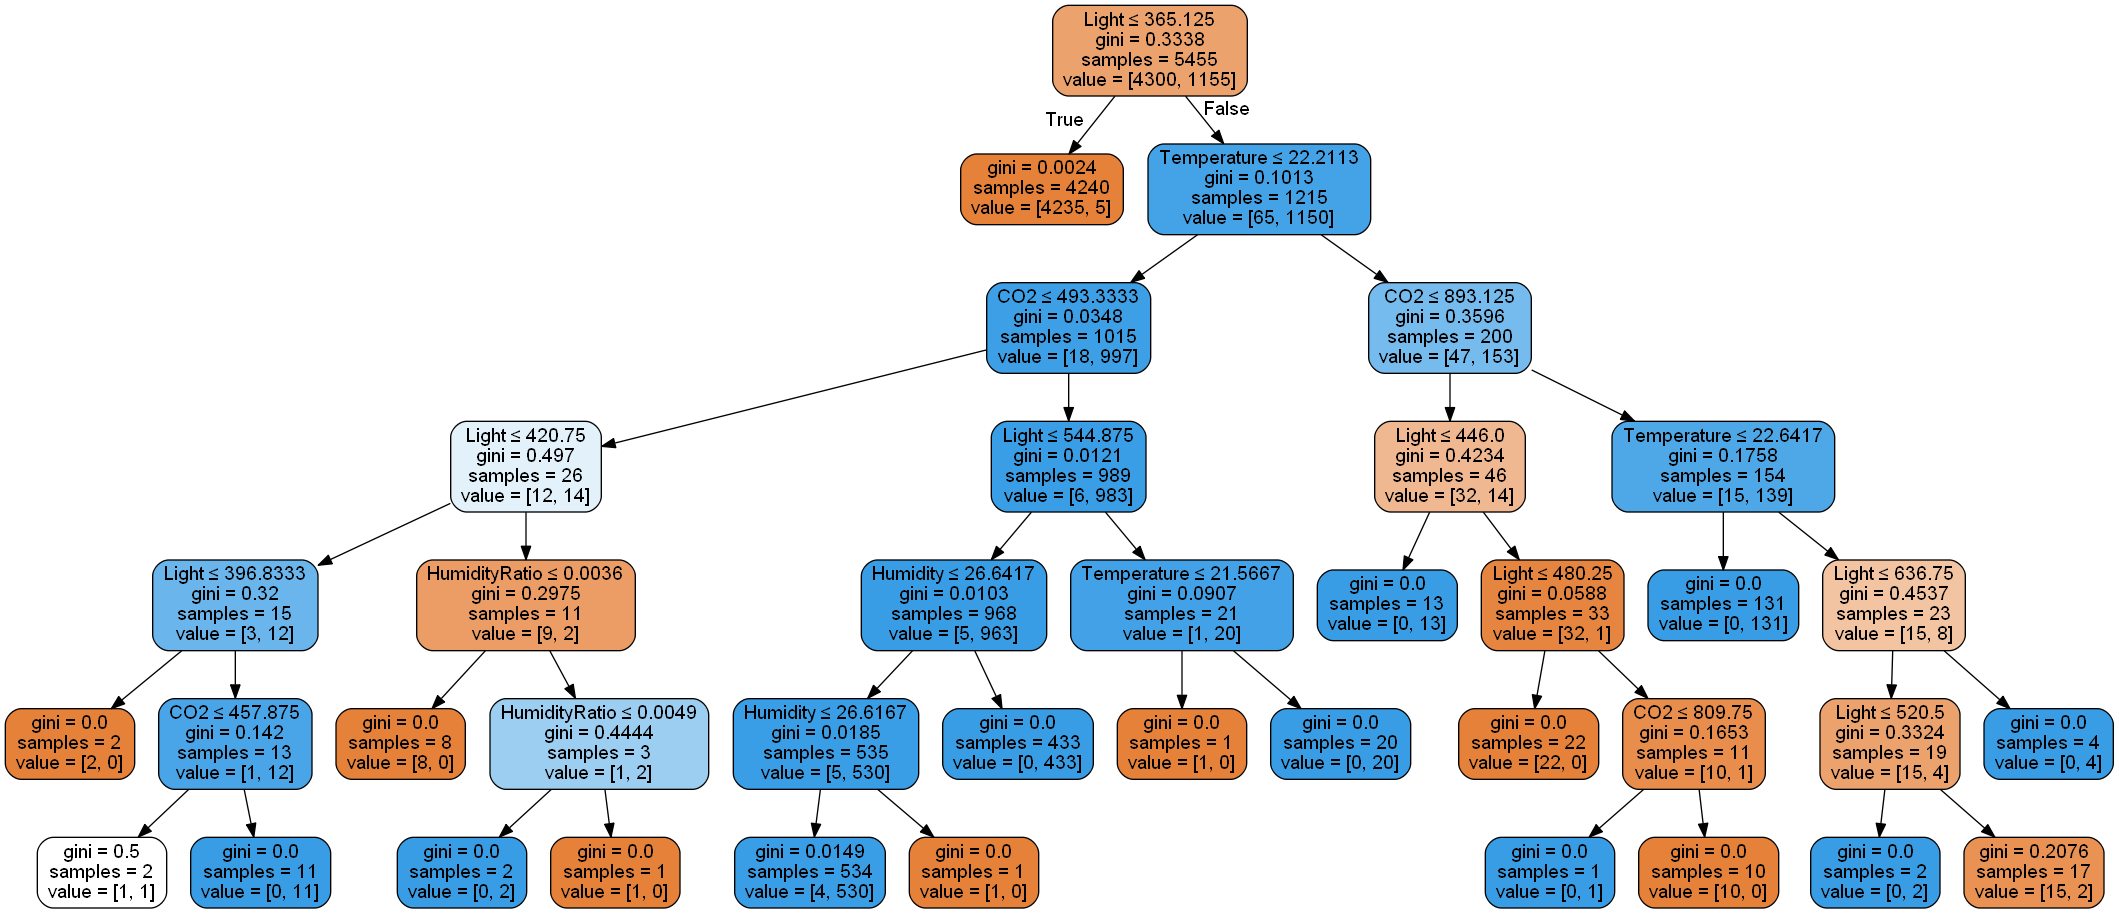

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_t, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Z-scoring data

In [14]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train,Y_train)

In [15]:
x_test = scaler.transform(X_test)

In [16]:
a = {}

a['X_train'] = x_train

a['Y_train'] = Y_train

a['X_test'] = x_test

a['y_test'] = Y_test

a['target_names'] = [0,1]

a['feature_names'] = ['date', 'Temperature','Humidity' ,'Light' ,'CO2' ,'HumidityRatio']

import pickle

pickle.dump(a, open("phindia1.pickle", "wb")) 

## L2 regularization

In [17]:
clf_lr2 = linear_model.LogisticRegression(penalty = 'l2')
clf_lr2.fit(x_train,Y_train)
features_sorted_orig1 = np.argsort(np.abs(clf_lr2.coef_[0]))[::-1]
for i in features_sorted_orig1:
    print("%s\t%0.3f" %(X_train.columns[i], clf_lr2.coef_[0][i]))

Light	3.672
CO2	1.958
Temperature	-1.281
HumidityRatio	-0.474
Humidity	0.109


# L1 regularization

In [18]:
clf_lr3 = linear_model.LogisticRegression(penalty = 'l1')
clf_lr3.fit(x_train,Y_train)
features_sorted_orig1 = np.argsort(np.abs(clf_lr3.coef_[0]))[::-1]
for i in features_sorted_orig1:
    print("%s\t%0.3f" %(X_train.columns[i], clf_lr3.coef_[0][i]))

Light	3.820
CO2	2.011
Temperature	-1.386
HumidityRatio	-0.360
Humidity	0.000


## DecisionTree Classification

In [19]:
from sklearn import tree
clf_t1 = tree.DecisionTreeClassifier(max_depth=6, min_impurity_split= 0.005)
clf_t1.fit(x_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=0.005, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
from sklearn.externals.six import StringIO  
 




In [21]:
from IPython.display import Image 

In [22]:
from sklearn.tree import export_graphviz

In [23]:
import pydotplus

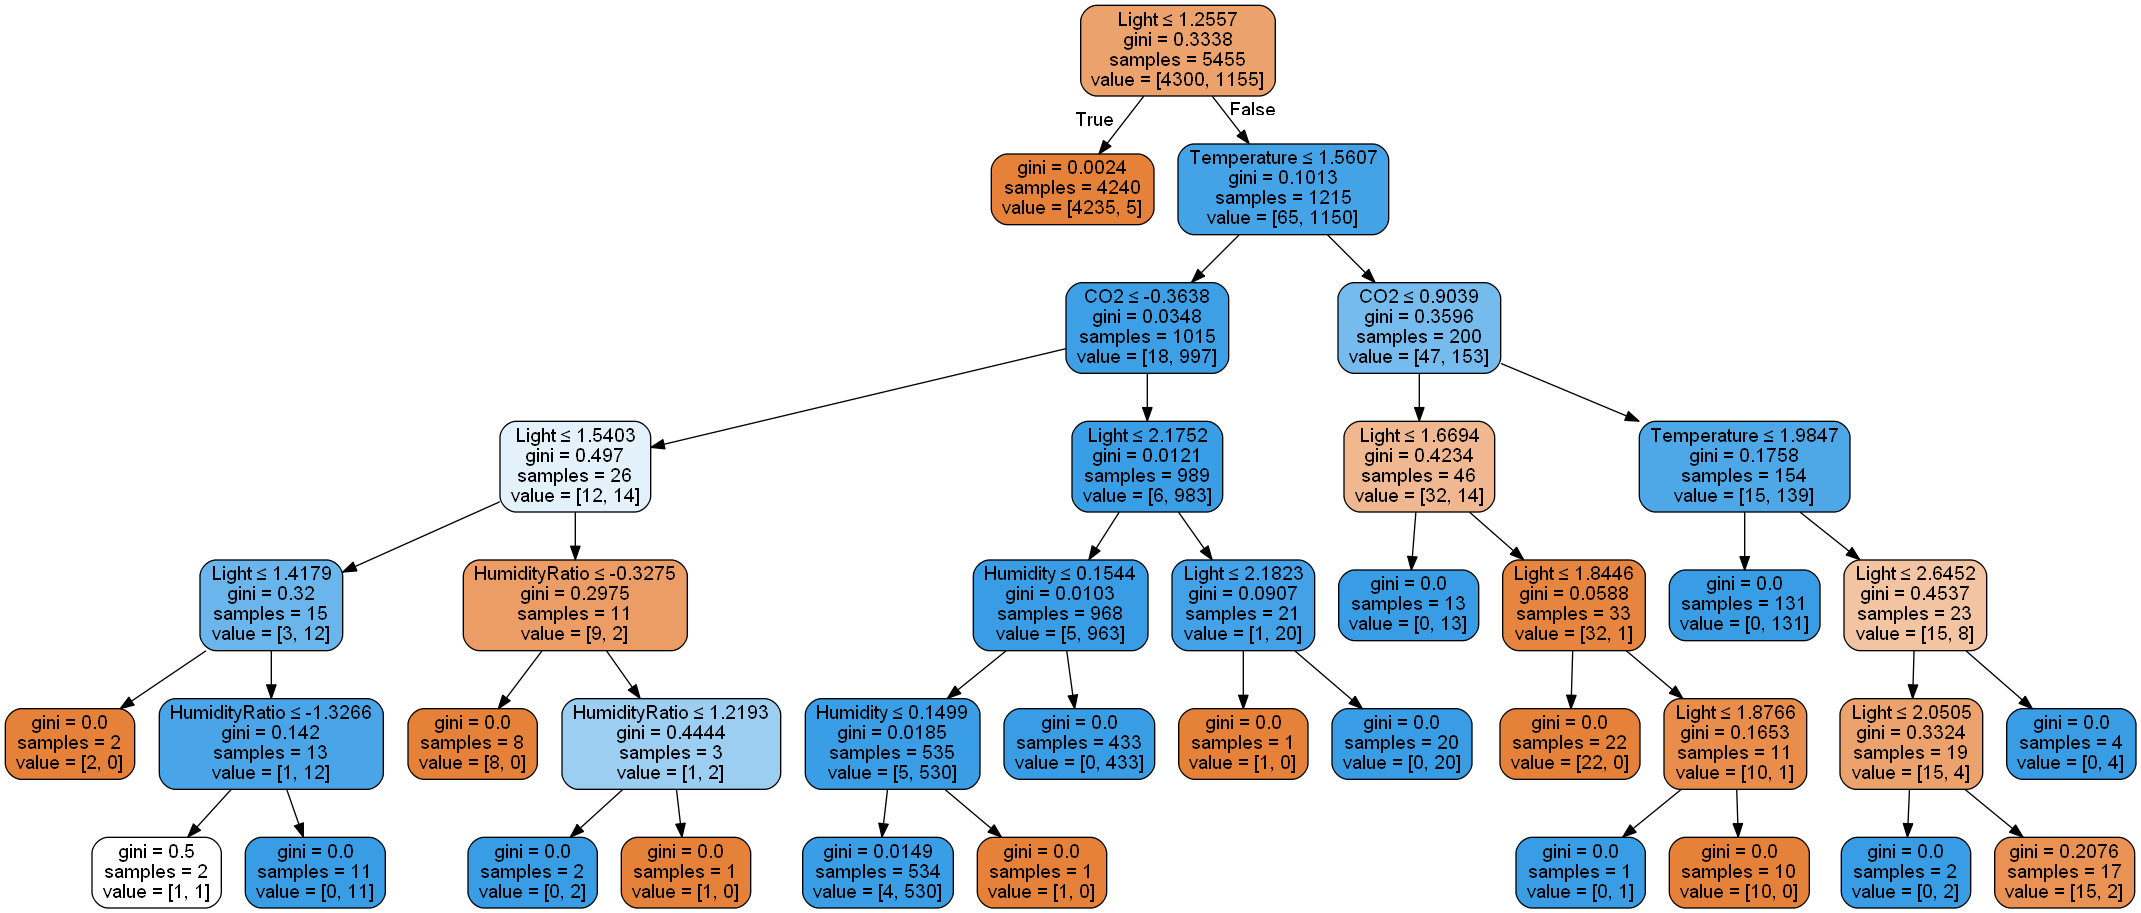

In [24]:
dot_data = StringIO()
export_graphviz(clf_t1, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Discuss Result

### Before Z-scoring the data it seems L2 and L1 have nearly the same feature absolute weights while after Z-scoring the data it seems like L2 and L1's feature absolute values changed compared to unscaled data but are very much near to each other's value. Comparing scaled and unscaled data we found that the Humidity feature has now much lesser weight than unscaled data. In scaled data humidity has the lowest abosulute value. Moreover there is significant increase in presence of CO2 in scaled data and that does make sense as we can say that if a room is more occupied than there is more presence of carbon dioxide due to exhalation while breathing and vice a versa.

# evidence

# fitting model

In [25]:
logreg = linear_model.LogisticRegression(penalty='l2')
logreg.fit(x_train,Y_train)
bias_weight = logreg.intercept_
predict_proba = logreg.predict_proba(x_test)
weight = []
for i in range(len(train.columns.drop('Occupancy'))):
    weight.append((train.columns.drop('Occupancy')[i],logreg.coef_[0][i]))

## 1.The most positive object with respect to the probabilities

In [26]:
def evi_val(obj):
    positive_log_evidence = []
    negative_log_evidence = []
    for x,value in enumerate(obj):
        evidence = float(value*weight[i][1])
        if evidence>0:
            positive_log_evidence.append((evidence,weight[i][0])) 
        else:
            negative_log_evidence.append((evidence,weight[i][0]))
    return(positive_log_evidence,negative_log_evidence)

    

In [27]:
index = np.argmin(predict_proba[:,0])
obj = x_test[index,]
print("total positive evidence :")
print(sum(x for x,_ in evi_val(obj)[0]))
print("total negative evidence :")
print(sum(x for x, _ in evi_val(obj)[1]))

total positive evidence :
0
total negative evidence :
-6.149820597489522


In [28]:
print("probability distribution [True False] = ", predict_proba[index])

probability distribution [True False] =  [  3.53897908e-04   9.99646102e-01]


## 2.The most negative object with respect to the probabilities

In [29]:
index = np.argmin(predict_proba[:,1])
obj = x_test[index,]
print("total positive evidence: ")
print(sum(x for x,_ in evi_val(obj)[0]))
print("total negative evidence: ")
print(sum(x for x, _ in evi_val(obj)[1]))

total positive evidence: 
0.2900901434996109
total negative evidence: 
-1.813530524548801


In [30]:
print("probability distribution [True False] ", predict_proba[index])

probability distribution [True False]  [  9.99894680e-01   1.05319811e-04]


## 3.The object that has the largest positive evidence

In [31]:
pos_evidence_list= []
neg_evidence_list= []
for x in range(0,len(x_test)):
    pos_evidence_list.append(sum(x for x, _ in evi_val(X_test.iloc[x])[0]))
    neg_evidence_list.append(sum(x for x, _ in evi_val(X_test.iloc[x])[1]))
pos_evidence_list = np.array(pos_evidence_list)
neg_evidence_list = np.array(neg_evidence_list)

In [32]:
index = np.argmax(pos_evidence_list)
obj = x_test[index,]
print("total positive evidence:")
print(sum(x for x,_ in evi_val(obj)[0]))
print("total negative evidence: ")
print(sum(x for x, _ in evi_val(obj)[1]))


total positive evidence:
0
total negative evidence: 
-5.956398280121476


In [33]:
print("probability distribution [True  False]" ) 
print(predict_proba[index])

probability distribution [True  False]
[  4.71511883e-04   9.99528488e-01]


## 4.The object that has the largest negative evidence

In [34]:
index = np.argmin(neg_evidence_list)
obj = x_test[index,]

In [35]:
print("total positive evidence:")
print(sum(x for x,_ in evi_val(obj)[0]))
print("total negative evidence= ")
print(sum(x for x, _ in evi_val(obj)[1]))

total positive evidence:
0
total negative evidence= 
-6.149820597489522


In [36]:
print("probability distribution [True  False] = ", predict_proba[index])

probability distribution [True  False] =  [  3.53897908e-04   9.99646102e-01]


## 5.The most uncertain object (the probabilities are closest to 0.5)

## Reference Professor's logistic regression python notebook and stackoverflow
